In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D ,LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np




In [2]:
df = pd.read_csv(r"D:\fog-computing-intrusion-detection\fog-computing-intrusion-detection\IoT_Datasets\Merged_CSV\Merged01.csv")
df

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.00,0.0,0.00,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.00,0.0,0.00,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.00,0.0,0.00,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.10,0.0,0.30,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.00,0.0,0.00,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712306,20.00,6,64.00,33177.535200,0.00,1.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000034,100,0.000000,DDOS-SYN_FLOOD
712307,8.00,17,64.00,49038.980475,0.00,0.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000020,100,0.000000,DOS-UDP_FLOOD
712308,20.00,6,67.82,10496.518932,0.98,0.0,0.98,0.01,0.02,0.0,...,6061,60,121,60.61,6.100000,60.61,0.000102,100,37.210000,DDOS-RSTFINFLOOD
712309,20.00,6,64.00,23321.123158,0.00,1.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.000000,60.00,0.000048,100,0.000000,DDOS-SYNONYMOUSIP_FLOOD


In [3]:
X = df.drop(columns=["Label"]).replace([np.inf,-np.inf],np.nan)
X = X.fillna(X.mean())
X = X.values
y = df["Label"].values

In [4]:
y = y.astype(str)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [5]:
num_classes = len(np.unique(y))
num_classes

34

In [6]:
y = to_categorical(y,num_classes=num_classes)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [32]:
X = X.reshape(X.shape[0],X.shape[1],1)


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [42]:
model = Sequential([
    Conv1D(filters=32,kernel_size=9,activation='relu',input_shape=(X.shape[1],1)),
    MaxPooling1D(pool_size=2),
    LSTM(16,dropout=0.2),
    Dense(num_classes,activation="sigmoid")
])

In [43]:
model.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics=["accuracy"])


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 31, 32)            320       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 34)                578       
                                                                 
Total params: 4,034
Trainable params: 4,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
2226/2226 [==============================] - 59s 25ms/step - loss: 0.9838 - accuracy: 0.6459 - val_loss: 0.6049 - val_accuracy: 0.7212
Epoch 2/20
2226/2226 [==============================] - 74s 33ms/step - loss: 0.5829 - accuracy: 0.7220 - val_loss: 0.5494 - val_accuracy: 0.7255
Epoch 3/20
2226/2226 [==============================] - 86s 39ms/step - loss: 0.5506 - accuracy: 0.7291 - val_loss: 0.5311 - val_accuracy: 0.7342
Epoch 4/20
2226/2226 [==============================] - 81s 36ms/step - loss: 0.5351 - accuracy: 0.7338 - val_loss: 0.5203 - val_accuracy: 0.7375
Epoch 5/20
2226/2226 [==============================] - 78s 35ms/step - loss: 0.5240 - accuracy: 0.7369 - val_loss: 0.5098 - val_accuracy: 0.7402
Epoch 6/20
2226/2226 [==============================] - 80s 36ms/step - loss: 0.5179 - accuracy: 0.7383 - val_loss: 0.5068 - val_accuracy: 0.7421
Epoch 7/20
2226/2226 [==============================] - 79s 35ms/step - loss: 0.5134 - accuracy: 0.7398 - val_loss: 0.5037 -

In [46]:
loss , acc = model.evaluate(X_test,y_test)
acc

4452/4452 [==============================] - 22s 5ms/step - loss: 0.4904 - accuracy: 0.7493


0.7492541670799255

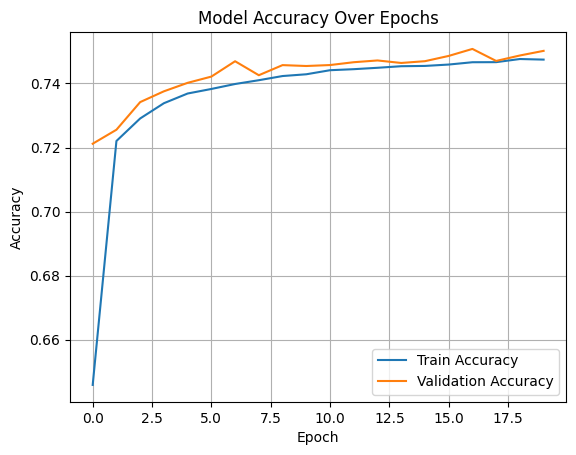

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid(True)
plt.show()

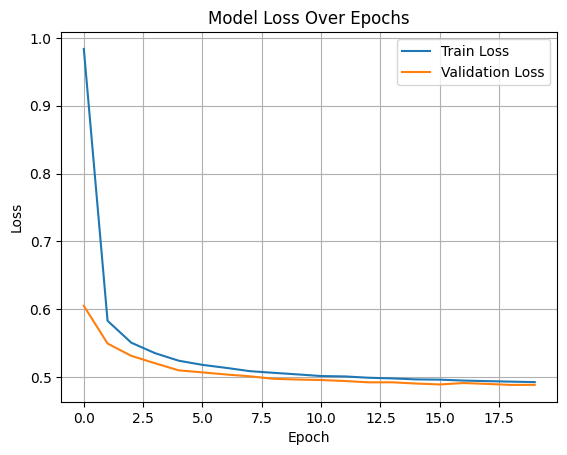

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.show()